# Exercise 7 - Project

### Introduction
Our project comes from the following Kaggle competition:
https://www.kaggle.com/c/shelter-animal-outcomes/data

### Import Data, libraries

In [1]:
# Comment the following line out if pandas_profiling has not been installed
# Don't use the latest version (1.4.1) due to error - https://bit.ly/2CYViwD
# !pip install pandas_profiling==1.4.0

In [2]:
# Essential Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re, math
from pandas_profiling import ProfileReport

# Matplotlib Inline
%matplotlib inline

In [3]:
dirData = 'data/' # not good for variables. C- (Capitalised variables)
dirImage = 'image/'
train = pd.read_csv(dirData + 'train.csv', parse_dates=['DateTime'])
test = pd.read_csv(dirData + 'test.csv')
sample = pd.read_csv(dirData + 'sample_submission.csv')

### Exploratory Data Analysis

In [4]:
train.head()
#train

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [5]:
train.dtypes

AnimalID                  object
Name                      object
DateTime          datetime64[ns]
OutcomeType               object
OutcomeSubtype            object
AnimalType                object
SexuponOutcome            object
AgeuponOutcome            object
Breed                     object
Color                     object
dtype: object

In [6]:
test.head()

,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
3,4,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
4,5,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White


In [7]:
test.dtypes

ID                 int64
Name              object
DateTime          object
AnimalType        object
SexuponOutcome    object
AgeuponOutcome    object
Breed             object
Color             object
dtype: object

In [8]:
train.describe()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
count,26729,19038,26729,26729,13117,26729,26728,26711,26729,26729
unique,26729,6374,22918,5,16,2,5,44,1380,366
top,A682889,Max,2015-08-11 00:00:00,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,1,136,19,10769,7816,15595,9779,3969,8810,2824
first,NaN,NaN,2013-10-01 09:31:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2016-02-21 19:17:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#ProfileReport(train).to_file('./report/ProfileTrain.html')

# check documentation, save to HTML instead - assign it and use to_html?
# Warnings always comes for ID. High carindalities
# Missing - Data gone!
# Need to use this to help fill in data. Impu

In [10]:
train

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan
5,A677334,Elsa,2014-04-25 13:04:00,Transfer,Partner,Dog,Intact Female,1 month,Cairn Terrier/Chihuahua Shorthair,Black/Tan
6,A699218,Jimmy,2015-03-28 13:11:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Tabby
7,A701489,NaN,2015-04-30 17:02:00,Transfer,Partner,Cat,Unknown,3 weeks,Domestic Shorthair Mix,Brown Tabby
8,A671784,Lucy,2014-02-04 17:17:00,Adoption,NaN,Dog,Spayed Female,5 months,American Pit Bull Terrier Mix,Red/White
9,A677747,NaN,2014-05-03 07:48:00,Adoption,Offsite,Dog,Spayed Female,1 year,Cairn Terrier,White


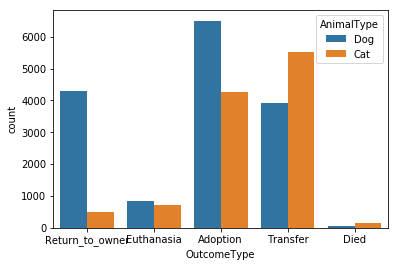

In [11]:
sns.countplot(data = train, x = 'OutcomeType', hue = 'AnimalType')

In [12]:
# extra
train[train.OutcomeSubtype.isnull()].OutcomeType.value_counts()

Adoption           8803
Return_to_owner    4786
Died                 16
Transfer              6
Euthanasia            1
Name: OutcomeType, dtype: int64

In [13]:
train.OutcomeType.value_counts()

Adoption           10769
Transfer            9422
Return_to_owner     4786
Euthanasia          1555
Died                 197
Name: OutcomeType, dtype: int64

In [14]:
pd.get_dummies(data=train, columns = ['AnimalType','Breed','SexuponOutcome'])

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AgeuponOutcome,Color,AnimalType_Cat,AnimalType_Dog,Breed_Abyssinian Mix,...,Breed_Yorkshire Terrier/Norfolk Terrier,Breed_Yorkshire Terrier/Parson Russell Terrier,Breed_Yorkshire Terrier/Pomeranian,Breed_Yorkshire Terrier/Rat Terrier,Breed_Yorkshire Terrier/Toy Poodle,SexuponOutcome_Intact Female,SexuponOutcome_Intact Male,SexuponOutcome_Neutered Male,SexuponOutcome_Spayed Female,SexuponOutcome_Unknown
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,1 year,Brown/White,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,1 year,Cream Tabby,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,2 years,Blue/White,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,3 weeks,Blue Cream,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,2 years,Tan,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,A677334,Elsa,2014-04-25 13:04:00,Transfer,Partner,1 month,Black/Tan,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6,A699218,Jimmy,2015-03-28 13:11:00,Transfer,Partner,3 weeks,Blue Tabby,1,0,0,...,0,0,0,0,0,0,1,0,0,0
7,A701489,NaN,2015-04-30 17:02:00,Transfer,Partner,3 weeks,Brown Tabby,1,0,0,...,0,0,0,0,0,0,0,0,0,1
8,A671784,Lucy,2014-02-04 17:17:00,Adoption,NaN,5 months,Red/White,0,1,0,...,0,0,0,0,0,0,0,0,1,0
9,A677747,NaN,2014-05-03 07:48:00,Adoption,Offsite,1 year,White,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [15]:
train['Color'].unique()

array(['Brown/White', 'Cream Tabby', 'Blue/White', 'Blue Cream', 'Tan',
       'Black/Tan', 'Blue Tabby', 'Brown Tabby', 'Red/White', 'White',
       'Black', 'Silver', 'Brown', 'Black/Red', 'White/Cream',
       'Orange Tabby/White', 'Black/White', 'Brown Brindle/White',
       'Black/Brown', 'Orange Tabby', 'Chocolate/White', 'White/Tan',
       'Cream Tabby/White', 'Blue', 'Calico', 'Torbie', 'Brown/Black',
       'Yellow', 'Tricolor', 'White/Black', 'Tortie', 'Blue Tabby/White',
       'Gray/White', 'Tan/Black', 'Tan/White', 'Buff',
       'Brown Tabby/White', 'Red', 'Blue/Tan', 'Seal Point',
       'Brown Brindle', 'White/Brown', 'Gray', 'Yellow Brindle/White',
       'Fawn/White', 'Flame Point', 'Black Tabby/White', 'Tortie/Calico',
       'Black/Brown Brindle', 'White/Gray', 'Tan/Silver',
       'Red Tick/Black', 'White/Cream Tabby', 'Blue Merle',
       'Chocolate/Tan', 'Sable', 'Brown Merle/White', 'Brown Tiger/White',
       'Liver/White', 'White/Blue Tabby', 'Black/Gray', 'C

In [16]:
train.Breed.value_counts()

Domestic Shorthair Mix                          8810
Pit Bull Mix                                    1906
Chihuahua Shorthair Mix                         1766
Labrador Retriever Mix                          1363
Domestic Medium Hair Mix                         839
German Shepherd Mix                              575
Domestic Longhair Mix                            520
Siamese Mix                                      389
Australian Cattle Dog Mix                        367
Dachshund Mix                                    318
Boxer Mix                                        245
Miniature Poodle Mix                             233
Border Collie Mix                                229
Australian Shepherd Mix                          163
Catahoula Mix                                    157
Rat Terrier Mix                                  157
Jack Russell Terrier Mix                         146
Domestic Shorthair                               143
Yorkshire Terrier Mix                         

### (Slight) Changes to Data
Converting the age of each animal into days for better accuracy

In [17]:
train['AgeuponOutcome'].head()

0     1 year
1     1 year
2    2 years
3    3 weeks
4    2 years
Name: AgeuponOutcome, dtype: object

In [18]:
# Age Outcome is in years, months, weeks and days
def ageindays(col):
    try:
        age = str(col).split(' ')
        value = float(age[0])
        dwmy = age[1]
        
        if (dwmy == 'year') | (dwmy == 'years'):
            return value * 365
        elif (dwmy == 'month') | (dwmy == 'months'):
            # Using 30 as a rough average. It's not *great* but it'll have to do.
            # As an alternative, you could use weeks (roughly 4 1/3 weeks in a month),
            # but you'll still have some inaccuracy. I blame the data :P 
            return value * (365/12)
        elif (dwmy == 'weeks') | (dwmy == 'week'):
            return value * 7
        elif (dwmy == 'days') | (dwmy == 'day'):
            return value
        else:
            return 0
    except:
        pass
    
train['AgeInDays'] = train['AgeuponOutcome'].apply(ageindays)
train['AgeInDays'].head()

0    365.0
1    365.0
2    730.0
3     21.0
4    730.0
Name: AgeInDays, dtype: float64

In [19]:
test['AgeInDays'] = test['AgeuponOutcome'].apply(ageindays)
test['AgeInDays'].head()

0    304.166667
1    730.000000
2    365.000000
3    121.666667
4    730.000000
Name: AgeInDays, dtype: float64

In [20]:
train.loc[train['AgeInDays'].idxmax()]

AnimalID                         A693678
Name                                  Kc
DateTime             2014-12-13 16:38:00
OutcomeType              Return_to_owner
OutcomeSubtype                       NaN
AnimalType                           Cat
SexuponOutcome             Intact Female
AgeuponOutcome                  20 years
Breed             Domestic Shorthair Mix
Color                  Brown Tabby/White
AgeInDays                           7300
Name: 13915, dtype: object

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

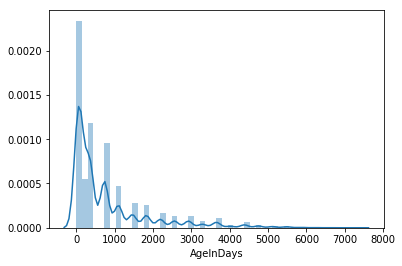

In [21]:
sns.distplot(train.AgeInDays.dropna())
sns.despine

At this point I'm making sure the IDs are named the same

In [22]:
def renameId(train, test):
    try:
        if (train == test):
            return train
        else:
            return test
    except:
        pass

# Keep the ID the same
train.rename(columns={train.columns[0]:renameId(train.columns[0], test.columns[0])}, inplace=True)    
train.head()

,ID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,AgeInDays
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,365.0
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,365.0
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,730.0
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,21.0
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,730.0


In [23]:
test.head()

,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,AgeInDays
0,1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White,304.166667
1,2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan,730.000000
2,3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby,365.000000
3,4,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor,121.666667
4,5,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White,730.000000


In [24]:
outcomeTypeCount = train['OutcomeType'].value_counts()
outcomeTypeCount

Adoption           10769
Transfer            9422
Return_to_owner     4786
Euthanasia          1555
Died                 197
Name: OutcomeType, dtype: int64

In [25]:
train = train[~train.AgeInDays.isnull()]
train.DateTime[0]

test = test[~test.AgeInDays.isnull()]
test.DateTime[0]

'2015-10-12 12:15:00'

In [26]:
train.DateTime[0]

Timestamp('2014-02-12 18:22:00')

In [27]:
train.Breed.head()

0          Shetland Sheepdog Mix
1         Domestic Shorthair Mix
2                   Pit Bull Mix
3         Domestic Shorthair Mix
4    Lhasa Apso/Miniature Poodle
Name: Breed, dtype: object

In [28]:
train['Breed'].str.contains('Mix').dtypes

dtype('bool')

In [29]:
# sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [30]:
train = pd.get_dummies(train, columns=['SexuponOutcome'])
train['year'] = train.DateTime.dt.year
train['month'] = train.DateTime.dt.month
train['day'] = train.DateTime.dt.day
train['hour'] = train.DateTime.dt.hour
train['minute'] = train.DateTime.dt.minute
train['has_name'] = np.where(train.Name.isnull(), 0, 1).astype(int)
train['has_mix'] = train['Breed'].str.contains('Mix')

In [31]:
train.shape

(26711, 22)

In [32]:
train.head()

,ID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,AgeuponOutcome,Breed,Color,AgeInDays,...,SexuponOutcome_Neutered Male,SexuponOutcome_Spayed Female,SexuponOutcome_Unknown,year,month,day,hour,minute,has_name,has_mix
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,1 year,Shetland Sheepdog Mix,Brown/White,365.0,...,1,0,0,2014,2,12,18,22,1,True
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,1 year,Domestic Shorthair Mix,Cream Tabby,365.0,...,0,1,0,2013,10,13,12,44,1,True
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,2 years,Pit Bull Mix,Blue/White,730.0,...,1,0,0,2015,1,31,12,28,1,True
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,3 weeks,Domestic Shorthair Mix,Blue Cream,21.0,...,0,0,0,2014,7,11,19,9,0,True
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,2 years,Lhasa Apso/Miniature Poodle,Tan,730.0,...,1,0,0,2013,11,15,12,52,0,False


In [33]:
test.head()

,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,AgeInDays
0,1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White,304.166667
1,2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan,730.000000
2,3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby,365.000000
3,4,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor,121.666667
4,5,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White,730.000000


## Decide on inputs (X) & outputs (y) 
#### Split the data into (train|validation|test)

In [34]:
train_X = train.filter(['AnimalType','AgeInDays','Breed'], axis=1)
train_y = train.filter(['OutcomeType'], axis=1)

### Decide on the estimator/algorithm class

In [35]:
petModel = RandomForestClassifier(random_state=42, n_estimators=100, n_jobs=1)

petParameters = {'max_depth': [3,5,10,15,20],
                 'n_estimators': [4,6,8,10],
                 'min_samples_split':[2,5,7,9],
                 'max_leaf_nodes':[None,2,3,4],
                 'max_features':[None,'auto','log2',0.5,1,2,3,4]}

petClf = GridSearchCV(petModel, petParameters, cv = 5)

### Fit (train) the learner

In [42]:
train_X1, train_X2, train_y1, train_y2 = train_test_split(train_X, train_y, random_state=0, train_size=0.5, test_size=0.5)

In [43]:
petClf.fit(train_X1, train_X2)

TypeError: '<' not supported between instances of 'float' and 'str'

In [44]:
train_X1.shape

(13355, 3)

In [45]:
train_X2.shape

(13356, 3)

### Predict